In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

#lastly, Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 

Training and Test datasets

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
np.unique(train_data.targets, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

quick check

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
np.unique(test_data.targets, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

DataLoader

In [ ]:
train_dataloader = DataLoader(dataset = train_data, batch_size = 64)

In [ ]:
test_dataloader = DataLoader(dataset = test_data, batch_size = 64)

In [ ]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_dataloader.dataset)

60000

In [ ]:
len(train_dataloader)

938

check 938 "groups" 

In [ ]:
for batch, (x, y) in enumerate(train_dataloader):
  print(batch + 1)
  print(f"shape of x: {x.shape}")
  print(f"shape of y: {y.shape} & dtype of y: {y.dtype}")

1
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
2
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
3
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
4
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
5
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
6
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
7
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
8
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
9
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
10
shape of x: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) & dtype of y: torch.int64
11
shape of x: torch.Size([64

creat neural network model

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
   super().__init__()
   self.flatten = nn.Flatten()
   self.linear_relu_stack = nn.Sequential(
       nn.Linear(in_features = 28*28, out_features = 512),
       nn.ReLU(),
       nn.Linear(in_features = 512, out_features = 512),
       nn.ReLU(),
       nn.Linear(in_features = 512, out_features = 10)
  )
  def forward(self, x):
    x = self.flatten(x)
    network = self.linear_relu_stack(x)
    return network

In [ ]:
simpleNN = NeuralNetwork()
simpleNN

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

loss fun and optimizer

In [ ]:
loss_func = nn.CrossEntropyLoss()

opt = torch.optim.SGD(
    params = simpleNN.parameters(), 
    lr = 1e-3
)

training fun

In [ ]:
def training(dataloader, model, loss_func, optimizer):
  size = len(dataloader.dataset)
  
  model.train()
  for batch, (x, y) in enumerate(dataloader):
    pred = model(x)
    loss = loss_func(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(x)
      print(f"loss: {loss:>5f} at {current:>5d}/{size:>5d}")

test fun - model against test data

In [ ]:
def testing(dataloader, model, loss_func):
  size = len(dataloader.dataset)
  num_batch = len(dataloader)

  model.eval()

  test_loss, correct = 0, 0

  with torch.no_grad():
    for x, y in dataloader:
      pred = model(x)

      test_loss += loss_func(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batch 
  correct /= size

  print(f"\n Test Evaluation: \n Accuracy: {(100*correct):>5f}%,\n Avg loss: {test_loss:>5f} \n")

train and evaluation

In [ ]:
epochs = 5

for t in range(epochs):
  print(f"\n\n  Epoch {t+1} --------------- \n")
  
  #training
  training(train_dataloader, simpleNN, loss_func, opt)

  #testing
  testing(test_dataloader, simpleNN, loss_func)



  Epoch 1 --------------- 

loss: 2.307576 at     0/60000
loss: 2.298524 at  6400/60000
loss: 2.279453 at 12800/60000
loss: 2.275286 at 19200/60000
loss: 2.258395 at 25600/60000
loss: 2.237197 at 32000/60000
loss: 2.248935 at 38400/60000
loss: 2.216416 at 44800/60000
loss: 2.208715 at 51200/60000
loss: 2.186510 at 57600/60000

 Test Evaluation: 
 Accuracy: 37.770000%,
 Avg loss: 2.175365 



  Epoch 2 --------------- 

loss: 2.183331 at     0/60000
loss: 2.177217 at  6400/60000
loss: 2.120324 at 12800/60000
loss: 2.131904 at 19200/60000
loss: 2.079182 at 25600/60000
loss: 2.032400 at 32000/60000
loss: 2.058182 at 38400/60000
loss: 1.982843 at 44800/60000
loss: 1.983887 at 51200/60000
loss: 1.921240 at 57600/60000

 Test Evaluation: 
 Accuracy: 52.260000%,
 Avg loss: 1.912819 



  Epoch 3 --------------- 

loss: 1.942282 at     0/60000
loss: 1.921659 at  6400/60000
loss: 1.802446 at 12800/60000
loss: 1.835607 at 19200/60000
loss: 1.714800 at 25600/60000
loss: 1.682310 at 32000/60000


visualization and predict 1st test image

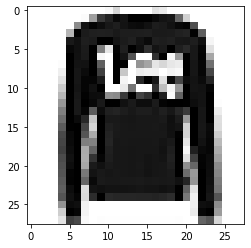

In [ ]:
lables = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",

]
plt.imshow(test_data.data[1], cmap = "Greys")

In [ ]:
x = test_data [0][0]

In [ ]:
y = test_data [0][1]

In [ ]:
with torch.no_grad():
  pred = simpleNN(x)
  prediction = lables[pred[0].argmax(0)]
  truth = lables[y]

  print(f"simpleNN predict as {prediction} ; truth is {truth}")

simpleNN predict as Ankle boot ; truth is Ankle boot
